### Read Raw Seabird CSV file for Quicklook

In [78]:
import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

import ctd
import pandas as pd

# science stack
import numpy as np

# Visual Stack

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [79]:
f = '/Users/bell/ecoraid/2018/CTDcasts/HE1801/WHOI_processed/bob_processed/HLY1801_072.cnv'

In [80]:
ctd_df = ctd.from_cnv(f)

/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ctd/ctd.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.header = header
/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/ctd/ctd.py:149: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.config = config


In [81]:
ctd_df.describe()

,depSM,t090C,t190C,c0mS/cm,c1mS/cm,flECO-AFL,CStarTr0,svCM,altM,scan,sbeox0V,sbeox1V,timeS,sal00,sal11,sbeox0ML/L,sbeox1ML/L,nbin
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,251.690224,0.241093,0.240595,28.260001,28.262523,1.840452,93.480083,1452.395258,99.752321,13120.932540,2.111045,1.986894,546.663937,33.552265,33.556005,6.739054,6.645026,11.267857
std,143.969120,1.053724,1.053551,1.586084,1.588501,0.140242,3.757888,6.721776,0.090516,4150.879552,0.195978,0.177747,172.953868,1.725791,1.727369,0.764084,0.749215,4.599429
min,2.969000,-1.312200,-1.311900,22.260029,22.211525,1.671500,85.540700,1434.530000,99.360000,4872.000000,1.934000,1.826100,202.973000,26.841400,26.801500,5.969800,5.889100,2.000000
25%,127.392750,-0.540850,-0.540300,26.576882,26.579506,1.762250,89.270475,1444.670000,99.770000,10170.000000,1.957000,1.848025,423.703000,32.505025,32.508100,6.093475,6.016175,8.000000
50%,251.740500,0.334100,0.334100,29.042389,29.045631,1.815000,95.018550,1454.640000,99.780000,13139.000000,2.035850,1.919300,547.420500,34.610550,34.614450,6.455100,6.370300,11.000000
75%,376.013000,0.688450,0.686550,29.566127,29.569712,1.868900,96.120300,1458.485000,99.790000,16114.000000,2.244175,2.109750,671.375250,34.774825,34.779200,7.478525,7.377425,14.000000
max,500.211000,4.732100,4.731000,29.739090,29.741855,3.274900,98.832300,1464.430000,99.810000,22141.000000,2.601500,2.422100,922.517000,34.845500,34.849200,8.492800,8.383200,39.000000


### Define a Class object for all plots

In [82]:
class CTDProfilePlot(object):


    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='seaborn-ticks'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        self.max_xticks = 10
        plt.style.use(stylesheet)
        mpl.rcParams['svg.fonttype'] = 'none'
        mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['axes.grid'] = True
        mpl.rcParams['axes.edgecolor'] = 'white'
        mpl.rcParams['axes.linewidth'] = 0.25
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['xtick.major.size'] = 2
        mpl.rcParams['xtick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.major.size'] = 2
        mpl.rcParams['ytick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.direction'] = 'out'
        mpl.rcParams['xtick.direction'] = 'out'
        mpl.rcParams['ytick.color'] = 'grey'
        mpl.rcParams['xtick.color'] = 'grey'
        
    def plot2var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, secondary=False, **kwargs):
      fig = plt.figure(1)
      ax1 = fig.add_subplot(111)
      p1 = ax1.plot(xdata[0], ydata)
      plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'])
      if secondary and not (xdata[1].size == 0):
        p1 = ax1.plot(xdata[1],ydata)
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

      ax1.invert_yaxis()
      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')
    
      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
      ax1.xaxis.set_major_formatter(fmt)
      ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)

      #plot second param
      ax2 = ax1.twiny()
      p1 = ax2.plot(xdata[2], ydata)
      plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                   linestyle=self.var2format(epic_key[2])['linestyle'],
                   linewidth=self.var2format(epic_key[2])['linewidth'])
      if secondary and not (xdata[3].size == 0):
        p1 = ax2.plot(xdata[3],ydata)
        plt.setp(p1, color=self.var2format(epic_key[3])['color'],
                     linestyle=self.var2format(epic_key[3])['linestyle'],
                     linewidth=self.var2format(epic_key[3])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
        abmax=np.max([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
        try:
          ax2.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])
        except:
          ax2.set_xlim([0,1])

      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[1], fontsize=self.labelsize, fontweight='bold')

      #set xticks and labels to be at the same spot for all three vars
      ax1.set_xticks(np.linspace(ax1.get_xbound()[0], ax1.get_xbound()[1], self.max_xticks))
      ax2.set_xticks(np.linspace(ax2.get_xbound()[0], ax2.get_xbound()[1], self.max_xticks))

      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[2])['format'])
      ax2.xaxis.set_major_formatter(fmt)
      ax2.tick_params(axis='x', which='major', labelsize=self.labelsize)


      return plt, fig

    @staticmethod
    def var2format(epic_key):
      """list of plot specifics based on variable name"""
      plotdic={}
      if epic_key in ['T_28']:
        plotdic['color']='red'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['T2_35']:
        plotdic['color']='magenta'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['S_41', 'OST_62', 'O_65']:
        plotdic['color']='blue'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        if epic_key in ['S_41']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['S_42', 'CTDOST_4220', 'CTDOXY_4221']:
        plotdic['color']='cyan'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:3.1f}'
        if epic_key in ['S_42']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['ST_70','Trb_980','SigmaT']:
        plotdic['color']='black'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['F_903','fWS_973','Fch_906']:
        plotdic['color']='green'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.2f}'
      elif epic_key in ['PAR_905']:
        plotdic['color']='darkorange'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.75
        plotdic['format']='{x:5.0f}'
      else:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=1.0      
        plotdic['format']='{x:.3f}'

      return plotdic

    @staticmethod
    #python3 change as dictionaries no longer have itervalues methods
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

### Create and Save Plots

Inputs are the respective columns in the data fram and identifiers for coloring.

In [83]:
ctd_data = CTDProfilePlot()

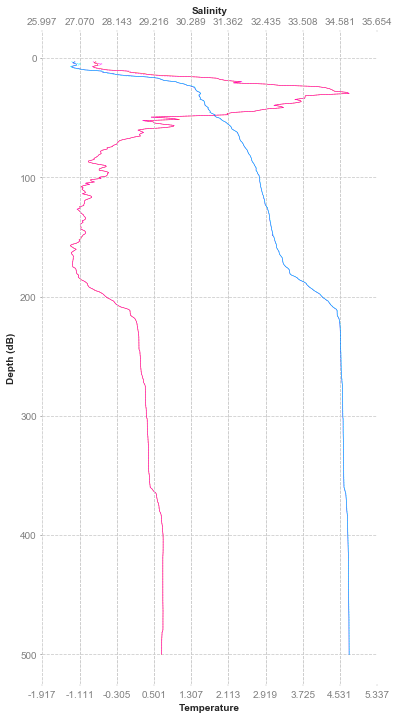

In [84]:
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','S_41','S_42'],
                  xdata=[ctd_df.t090C,ctd_df.t190C,ctd_df.sal00,ctd_df.sal11],
                  ydata=ctd_df.depSM,
                  secondary=True,
                  xlabel=['Temperature','Salinity'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','png'))